In [ ]:
df.info()
df.describe()


In [3]:
import pandas as pd

df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_pclass.style.format({'Survived': '{:.2%}'})


,Pclass,Survived
0,1,62.96%
1,2,47.28%
2,3,24.24%


In [9]:
df_sex.style.format({'Survived': '{:.2%}'})


,Sex,Survived
0,female,74.20%
1,male,18.89%


In [13]:
df_pivot = pd.pivot_table(
    df,
    values='Survived',
    index='Pclass',
    columns='Sex',
    aggfunc='mean'
)
df_pivot.style.format('{:.2%}')


Sex,female,male
Pclass,,
1,96.81%,36.89%
2,92.11%,15.74%
3,50.00%,13.54%


In [18]:
observed=True

In [20]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 30, 50, 80],
    labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
)

df_age = df.groupby('AgeGroup')['Survived'].mean().reset_index()
df_age
df_age = df.groupby('AgeGroup', observed=True)['Survived'].mean().reset_index()


C:\Users\Daniel\AppData\Local\Temp\ipykernel_11676\2234953139.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age = df.groupby('AgeGroup')['Survived'].mean().reset_index()


In [21]:
df_class_sex = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()


In [22]:
df_class_sex


,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [23]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df_family = df.groupby('FamilySize')['Survived'].mean().reset_index()
df_family

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [25]:
df_class_sex = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

df_class_sex['Survived'] = (df_class_sex['Survived'] * 100).round(2)
df_class_sex

,Pclass,Sex,Survived
0,1,female,96.81
1,1,male,36.89
2,2,female,92.11
3,2,male,15.74
4,3,female,50.00
5,3,male,13.54


In [29]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df_family = df.groupby('FamilySize')['Survived'].mean().reset_index()

df_family['Survived'] = (df_family['Survived'] * 100).round(2)
df_family.style.format({'Survived': '{:.2f}%'})
df_family




,FamilySize,Survived
0,1,30.35
1,2,55.28
2,3,57.84
3,4,72.41
4,5,20.00
5,6,13.64
6,7,33.33
7,8,0.00
8,11,0.00


In [32]:
df_pivot = pd.pivot_table(
    df,
    values='Survived',
    index='Pclass',
    columns='Sex',
    aggfunc='mean'
)


df_pivot = (df_pivot * 100).round(2)
df_pivot.style.format('{:.2f}%')

df_pivot

Sex,female,male
Pclass,,
1,96.81,36.89
2,92.11,15.74
3,50.00,13.54


In [33]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 30, 50, 80],
    labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
)

df_age = df.groupby('AgeGroup')['Survived'].mean().reset_index()
df_age['Survived'] = (df_age['Survived'] * 100).round(2)
df_age


C:\Users\Daniel\AppData\Local\Temp\ipykernel_11676\3023803075.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age = df.groupby('AgeGroup')['Survived'].mean().reset_index()


,AgeGroup,Survived
0,Child,57.97
1,Teen,42.86
2,YoungAdult,35.56
3,Adult,42.32
4,Senior,34.38


In [34]:
overall = df['Survived'].mean() * 100
overall

np.float64(38.38383838383838)

In [35]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')


In [36]:
df['Title'] = df['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Royalty',
    'Countess': 'Royalty',
    'Sir': 'Royalty',
    'Don': 'Royalty',
    'Dona': 'Royalty',
    'Jonkheer': 'Royalty',
    'Capt': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Dr': 'Officer',
    'Rev': 'Officer'
})

In [37]:
df_big = df.groupby(['Title', 'Sex', 'Pclass'])['Survived'] \
            .mean() \
            .mul(100) \
            .round(2) \
            .reset_index() \
            .sort_values(by=['Title', 'Pclass'])
df_big

,Title,Sex,Pclass,Survived
0,Master,male,1,100.00
1,Master,male,2,100.00
2,Master,male,3,39.29
3,Miss,female,1,95.83
4,Miss,female,2,94.29
5,Miss,female,3,50.00
6,Mr,male,1,34.58
7,Mr,male,2,8.79
8,Mr,male,3,11.29
9,Mrs,female,1,97.67


In [38]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0,12,18,30,50,80],
    labels=['Child','Teen','YoungAdult','Adult','Senior']
)

df_bigger = df.groupby(['Title','Sex','Pclass','AgeGroup'])['Survived'] \
              .mean() \
              .mul(100) \
              .round(2) \
              .reset_index()
df_bigger

C:\Users\Daniel\AppData\Local\Temp\ipykernel_11676\1269776972.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bigger = df.groupby(['Title','Sex','Pclass','AgeGroup'])['Survived'] \


,Title,Sex,Pclass,AgeGroup,Survived
0,Master,female,1,Child,NaN
1,Master,female,1,Teen,NaN
2,Master,female,1,YoungAdult,NaN
3,Master,female,1,Adult,NaN
4,Master,female,1,Senior,NaN
...,...,...,...,...,...
205,the Countess,male,3,Child,NaN
206,the Countess,male,3,Teen,NaN
207,the Countess,male,3,YoungAdult,NaN
208,the Countess,male,3,Adult,NaN


In [39]:
df_pivot_big = df.pivot_table(
    values='Survived',
    index=['Title'],
    columns=['Pclass', 'Sex'],
    aggfunc='mean'
).mul(100).round(2)
df_pivot_big

Pclass             1              2              3       
Sex           female    male female    male female   male
Title                                                    
Master           NaN  100.00    NaN  100.00    NaN  39.29
Miss           95.83     NaN  94.29     NaN   50.0    NaN
Mr               NaN   34.58    NaN    8.79    NaN  11.29
Mrs            97.67     NaN  90.24     NaN   50.0    NaN
Officer       100.00   44.44    NaN    0.00    NaN    NaN
Royalty       100.00   33.33    NaN     NaN    NaN    NaN
the Countess  100.00     NaN    NaN     NaN    NaN    NaN

In [40]:
df_pivot_big.style.format('{:.2f}%')\
    .background_gradient(cmap='RdYlGn')\
    .set_properties(**{'text-align': 'center'})


In [41]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')

df['Title'] = df['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Royalty',
    'Countess': 'Royalty',
    'Sir': 'Royalty',
    'Don': 'Royalty',
    'Dona': 'Royalty',
    'Jonkheer': 'Royalty',
    'Capt': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Dr': 'Officer',
    'Rev': 'Officer'
})


In [42]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 30, 50, 80],
    labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
)

In [43]:
df_big = df.groupby(['Title','Sex','Pclass','AgeGroup']).agg(
    SurvivalRate=('Survived', 'mean'),
    Count=('Survived', 'count')
).reset_index()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_11676\1936492195.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_big = df.groupby(['Title','Sex','Pclass','AgeGroup']).agg(


In [44]:
df_big['SurvivalRate'] = (df_big['SurvivalRate'] * 100).round(2)


In [45]:
df_big = df_big.dropna(subset=['SurvivalRate'])


In [46]:
df_big = df_big.sort_values(by='SurvivalRate', ascending=False)


In [47]:
df_big = df_big.sort_values(by='Count', ascending=False)


In [48]:
df_big.style.format({
    'SurvivalRate': '{:.2f}%',
    'Count': '{:,.0f}'
}).background_gradient(
    subset=['SurvivalRate'],
    cmap='RdYlGn'
)

,Title,Sex,Pclass,AgeGroup,SurvivalRate,Count
87,Mr,male,3,YoungAdult,14.75%,122
88,Mr,male,3,Adult,12.68%,71
78,Mr,male,1,Adult,45.24%,42
82,Mr,male,2,YoungAdult,2.94%,34
83,Mr,male,2,Adult,11.76%,34
86,Mr,male,3,Teen,7.69%,26
42,Miss,female,3,YoungAdult,48.00%,25
25,Master,male,3,Child,37.50%,24
40,Miss,female,3,Child,47.83%,23
79,Mr,male,1,Senior,13.64%,22


In [67]:
import pandas as pd




df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')


df['Title'] = df['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Royalty',
    'Countess': 'Royalty',
    'Sir': 'Royalty',
    'Don': 'Royalty',
    'Dona': 'Royalty',
    'Jonkheer': 'Royalty',
    'Capt': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Dr': 'Officer',
    'Rev': 'Officer'
})


df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 30, 50, 80],
    labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
)


df_big = df.groupby(['Title','Sex','Pclass','AgeGroup']).agg(
    SurvivalRate=('Survived', 'mean'),
    Count=('Survived', 'count')
).reset_index()


df_big['SurvivalRate'] = (df_big['SurvivalRate'] * 100).round(2)


df_big = df_big.dropna(subset=['SurvivalRate'])


df_big = df_big.sort_values(by='SurvivalRate', ascending=False)


df_big



C:\Users\Daniel\AppData\Local\Temp\ipykernel_11676\1061765667.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_big = df.groupby(['Title','Sex','Pclass','AgeGroup']).agg(


,Title,Sex,Pclass,AgeGroup,SurvivalRate,Count
15,Master,male,1,Child,100.00,3
20,Master,male,2,Child,100.00,9
32,Miss,female,1,YoungAdult,100.00,20
31,Miss,female,1,Teen,100.00,7
35,Miss,female,2,Child,100.00,8
34,Miss,female,1,Senior,100.00,4
36,Miss,female,2,Teen,100.00,5
96,Mrs,female,2,Teen,100.00,1
94,Mrs,female,1,Senior,100.00,9
93,Mrs,female,1,Adult,100.00,19


In [68]:
df_big.style.format({
    'SurvivalRate': '{:.2f}%',
    'Count': '{:,.0f}'
}).background_gradient(
    subset=['SurvivalRate'], 
    cmap='RdYlGn'
).set_properties(**{
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]}
])

,Title,Sex,Pclass,AgeGroup,SurvivalRate,Count
15,Master,male,1,Child,100.00%,3
20,Master,male,2,Child,100.00%,9
32,Miss,female,1,YoungAdult,100.00%,20
31,Miss,female,1,Teen,100.00%,7
35,Miss,female,2,Child,100.00%,8
34,Miss,female,1,Senior,100.00%,4
36,Miss,female,2,Teen,100.00%,5
96,Mrs,female,2,Teen,100.00%,1
94,Mrs,female,1,Senior,100.00%,9
93,Mrs,female,1,Adult,100.00%,19


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [52]:
import seaborn as sns


ModuleNotFoundError: No module named 'seaborn'

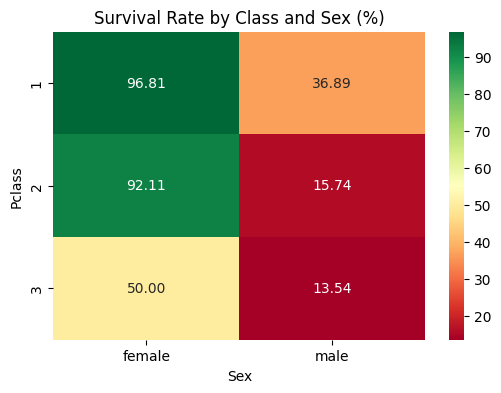

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


pivot_class_sex = df.pivot_table(
    values='Survived',
    index='Pclass',
    columns='Sex',
    aggfunc='mean'
) * 100 

plt.figure(figsize=(6,4))
sns.heatmap(pivot_class_sex, annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('Survival Rate by Class and Sex (%)')
plt.show()


In [56]:
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low','Medium','High','Very High'])

df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 30, 50, 80],
    labels=['Child','Teen','YoungAdult','Adult','Senior']
)

In [57]:
pivot_fare_age = df.pivot_table(
    values='Survived',
    index='FareGroup',
    columns='AgeGroup',
    aggfunc='mean'
) * 100  

C:\Users\Daniel\AppData\Local\Temp\ipykernel_11676\1159878948.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_fare_age = df.pivot_table(


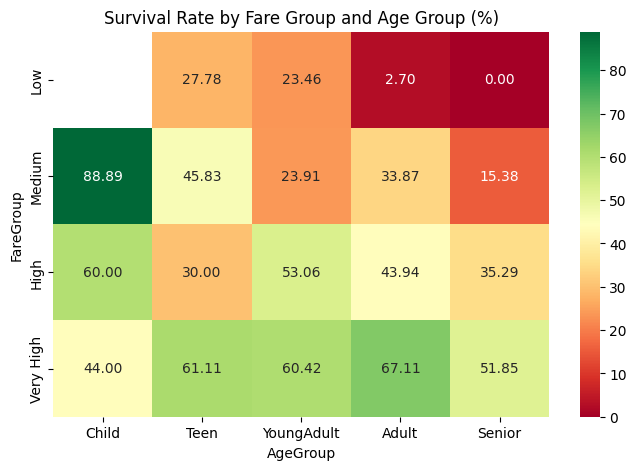

In [58]:
plt.figure(figsize=(8,5))
sns.heatmap(pivot_fare_age, annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('Survival Rate by Fare Group and Age Group (%)')
plt.show()

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
df['Title'] = df['Title'].replace({
    'Mlle':'Miss','Ms':'Miss','Mme':'Mrs',
    'Lady':'Royalty','Countess':'Royalty','Sir':'Royalty','Don':'Royalty','Dona':'Royalty','Jonkheer':'Royalty',
    'Capt':'Officer','Col':'Officer','Major':'Officer','Dr':'Officer','Rev':'Officer'
})


df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,30,50,80],
                        labels=['Child','Teen','YoungAdult','Adult','Senior'])

sns.set_theme(context="notebook", style="whitegrid")


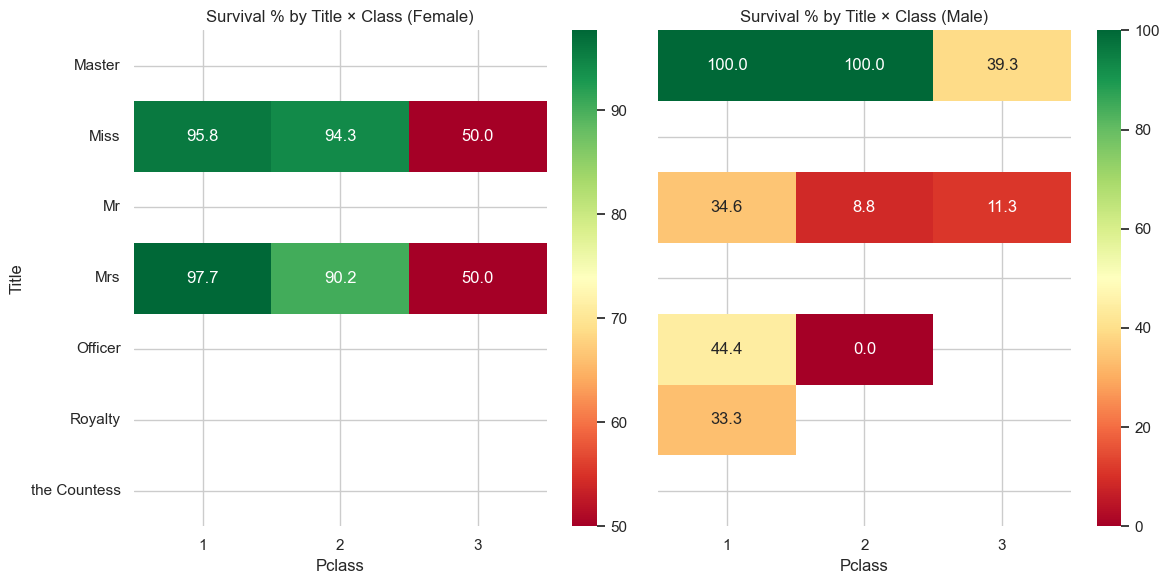

In [61]:
surv = (df.pivot_table(values='Survived',
                       index='Title', columns=['Pclass','Sex'],
                       aggfunc='mean') * 100)
cnt  =  df.pivot_table(values='Survived',
                       index='Title', columns=['Pclass','Sex'],
                       aggfunc='count')


surv_f = surv.xs('female', level='Sex', axis=1)
surv_m = surv.xs('male',   level='Sex', axis=1)

cnt_f  = cnt.xs('female', level='Sex', axis=1)
cnt_m  = cnt.xs('male',   level='Sex', axis=1)


mask_f = cnt_f < 3
mask_m = cnt_m < 3

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.heatmap(surv_f, annot=True, fmt='.1f', cmap='RdYlGn', mask=mask_f, ax=axes[0])
axes[0].set_title('Survival % by Title × Class (Female)')
axes[0].set_xlabel('Pclass'); axes[0].set_ylabel('Title')

sns.heatmap(surv_m, annot=True, fmt='.1f', cmap='RdYlGn', mask=mask_m, ax=axes[1])
axes[1].set_title('Survival % by Title × Class (Male)')
axes[1].set_xlabel('Pclass'); axes[1].set_ylabel('')

plt.tight_layout(); plt.show()

In [66]:
wide = []
for pc in [1,2,3]:
    for sx in ['female','male']:
        s = (df[(df['Pclass']==pc) & (df['Sex']==sx)]
               .groupby('Title')['Survived'].mean() * 100)
        wide.append(s.rename(f'{pc}_{sx}'))
mat = pd.concat(wide, axis=1)


counts = (df.groupby('Title')['Survived'].count())
mat = mat.loc[counts[counts>=3].index]


g = sns.clustermap(mat, cmap='RdYlGn', figsize=(8, 8),
                   annot=True, fmt='.1f', linewidths=.5)
g.ax_heatmap.set_title('Clustered Survival % by Title across (Class × Sex)')
plt.show()

RuntimeError: clustermap requires scipy to be available

C:\Users\Daniel\AppData\Local\Temp\ipykernel_11676\1347312477.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['AgeGroup','Pclass','Sex'])['Survived']


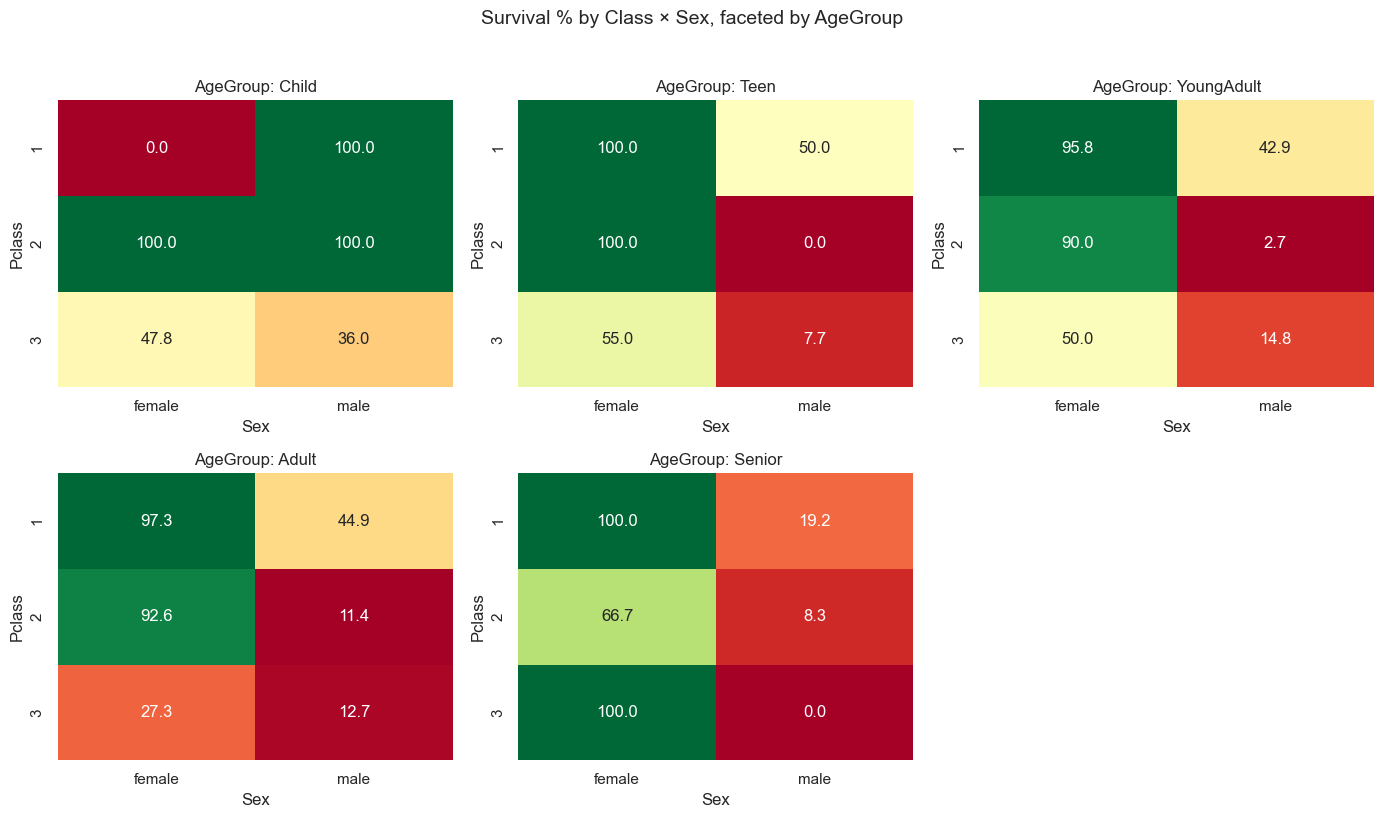

In [65]:
tidy = (df.dropna(subset=['AgeGroup'])
          .groupby(['AgeGroup','Pclass','Sex'])['Survived']
          .mean()
          .mul(100)
          .reset_index()
          .rename(columns={'Survived':'SurvivalPct'}))


def draw_one(ax, sub):
    piv = sub.pivot(index='Pclass', columns='Sex', values='SurvivalPct')
    sns.heatmap(piv, annot=True, fmt='.1f', cmap='RdYlGn', cbar=False, ax=ax)
    ax.set_xlabel('Sex'); ax.set_ylabel('Pclass')


age_levels = list(tidy['AgeGroup'].cat.categories)
n = len(age_levels)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.flatten()

for i, age in enumerate(age_levels):
    sub = tidy[tidy['AgeGroup']==age]
    draw_one(axes[i], sub)
    axes[i].set_title(f'AgeGroup: {age}')


for j in range(i+1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Survival % by Class × Sex, faceted by AgeGroup', y=1.02, fontsize=14)
plt.tight_layout(); plt.show()

In [69]:
df_filtered = df_big[df_big['Count'] >= 5]
best_groups = df_filtered.sort_values(by='SurvivalRate', ascending=False).head(10)
best_groups

,Title,Sex,Pclass,AgeGroup,SurvivalRate,Count
20,Master,male,2,Child,100.00,9
32,Miss,female,1,YoungAdult,100.00,20
31,Miss,female,1,Teen,100.00,7
35,Miss,female,2,Child,100.00,8
36,Miss,female,2,Teen,100.00,5
94,Mrs,female,1,Senior,100.00,9
93,Mrs,female,1,Adult,100.00,19
98,Mrs,female,2,Adult,94.74,19
33,Miss,female,1,Adult,93.33,15
37,Miss,female,2,YoungAdult,91.67,12


In [70]:
worst_groups = df_filtered.sort_values(by='SurvivalRate', ascending=True).head(10)
worst_groups

,Title,Sex,Pclass,AgeGroup,SurvivalRate,Count
81,Mr,male,2,Teen,0.00,6
89,Mr,male,3,Senior,0.00,9
82,Mr,male,2,YoungAdult,2.94,34
86,Mr,male,3,Teen,7.69,26
83,Mr,male,2,Adult,11.76,34
84,Mr,male,2,Senior,12.50,8
88,Mr,male,3,Adult,12.68,71
79,Mr,male,1,Senior,13.64,22
87,Mr,male,3,YoungAdult,14.75,122
103,Mrs,female,3,Adult,33.33,18


In [71]:
best_groups['Rank'] = range(1, len(best_groups)+1)
worst_groups['Rank'] = range(1, len(worst_groups)+1)

best_groups_display = best_groups[['Rank','Title','Sex','Pclass','AgeGroup','SurvivalRate','Count']]
worst_groups_display = worst_groups[['Rank','Title','Sex','Pclass','AgeGroup','SurvivalRate','Count']]

In [72]:
summary = pd.concat([
    best_groups_display.assign(Type='BEST'),
    worst_groups_display.assign(Type='WORST')
])
summary

,Rank,Title,Sex,Pclass,AgeGroup,SurvivalRate,Count,Type
20,1,Master,male,2,Child,100.00,9,BEST
32,2,Miss,female,1,YoungAdult,100.00,20,BEST
31,3,Miss,female,1,Teen,100.00,7,BEST
35,4,Miss,female,2,Child,100.00,8,BEST
36,5,Miss,female,2,Teen,100.00,5,BEST
94,6,Mrs,female,1,Senior,100.00,9,BEST
93,7,Mrs,female,1,Adult,100.00,19,BEST
98,8,Mrs,female,2,Adult,94.74,19,BEST
33,9,Miss,female,1,Adult,93.33,15,BEST
37,10,Miss,female,2,YoungAdult,91.67,12,BEST


In [73]:
summary.style.format({
    'SurvivalRate': '{:.2f}%',
    'Count': '{:,.0f}'
}).background_gradient(
    subset=['SurvivalRate'],
    cmap='RdYlGn'
)

,Rank,Title,Sex,Pclass,AgeGroup,SurvivalRate,Count,Type
20,1,Master,male,2,Child,100.00%,9,BEST
32,2,Miss,female,1,YoungAdult,100.00%,20,BEST
31,3,Miss,female,1,Teen,100.00%,7,BEST
35,4,Miss,female,2,Child,100.00%,8,BEST
36,5,Miss,female,2,Teen,100.00%,5,BEST
94,6,Mrs,female,1,Senior,100.00%,9,BEST
93,7,Mrs,female,1,Adult,100.00%,19,BEST
98,8,Mrs,female,2,Adult,94.74%,19,BEST
33,9,Miss,female,1,Adult,93.33%,15,BEST
37,10,Miss,female,2,YoungAdult,91.67%,12,BEST


In [12]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Daniel\data\Titanic\train.csv')
df.head()

df.shape
df.info()
df.describe()

print("Titanic dataset loaded successfully!")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Titanic dataset loaded successfully!


In [13]:
df.isnull().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [14]:
df[['Age', 'Fare']].describe()



,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [11]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)


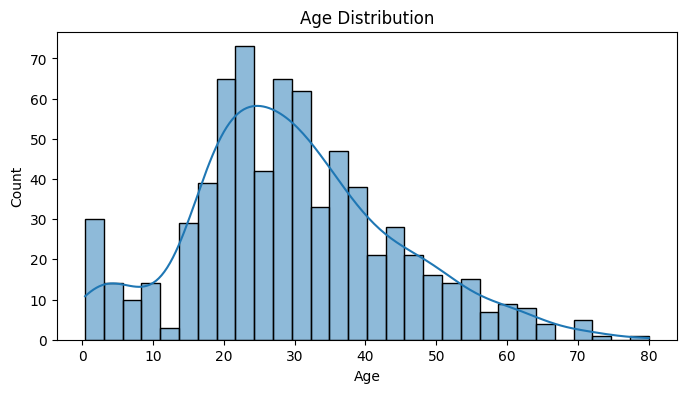

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

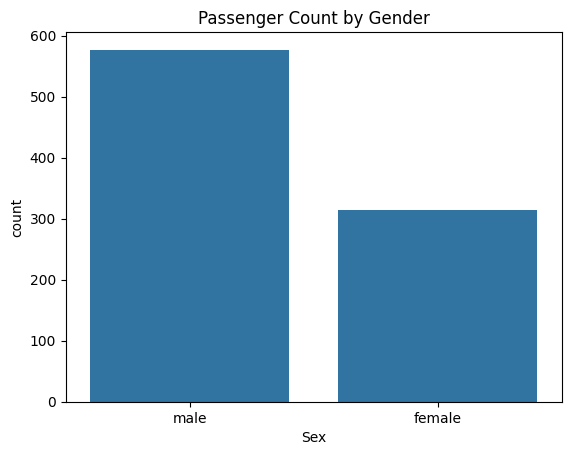

In [12]:

sns.countplot(x='Sex', data=df)
plt.title('Passenger Count by Gender')
plt.show()

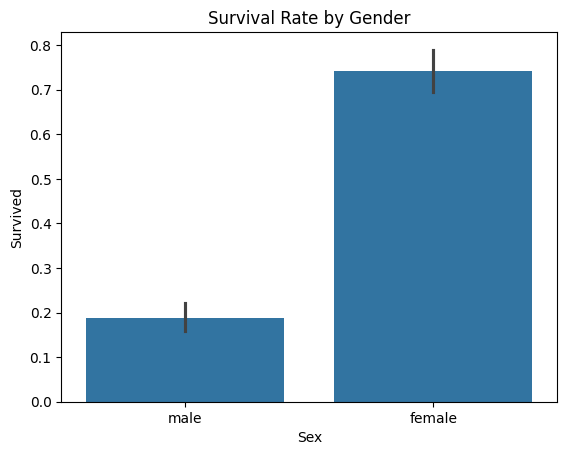

In [20]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

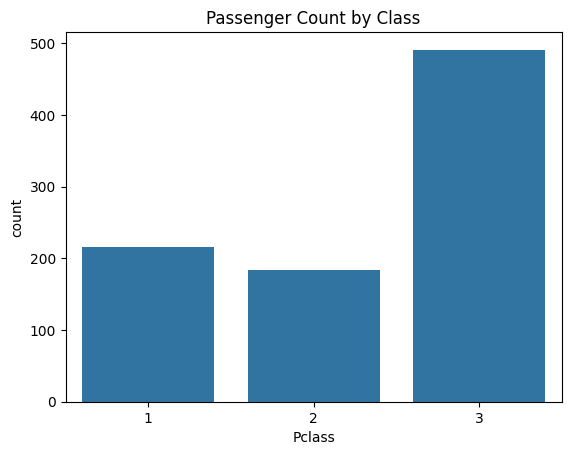

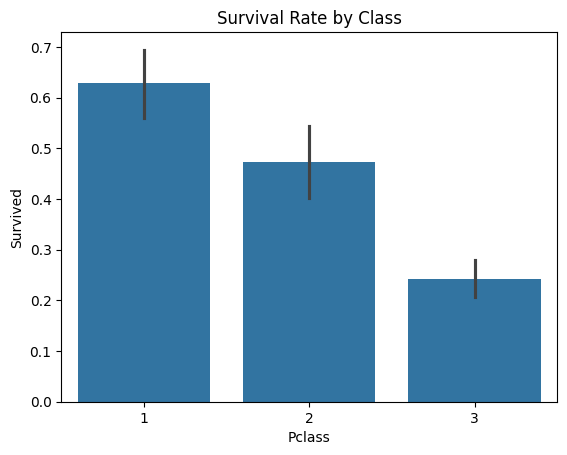

In [21]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Count by Class')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

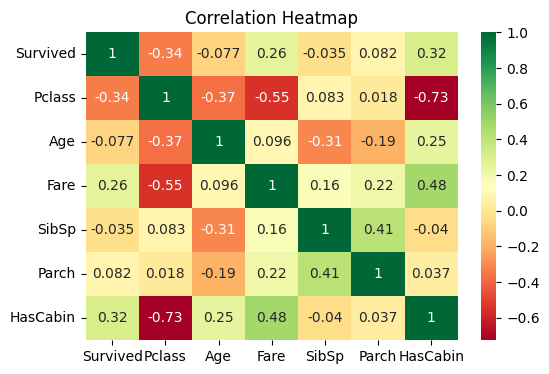

In [22]:
corr = df[['Survived','Pclass','Age','Fare','SibSp','Parch','HasCabin']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 
df[['SibSp', 'Parch', 'FamilySize']].head()


,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [24]:
family = df.groupby('FamilySize')['Survived'].mean().mul(100).round(2)
print(family)


FamilySize
1     30.35
2     55.28
3     57.84
4     72.41
5     20.00
6     13.64
7     33.33
8      0.00
11     0.00
Name: Survived, dtype: float64


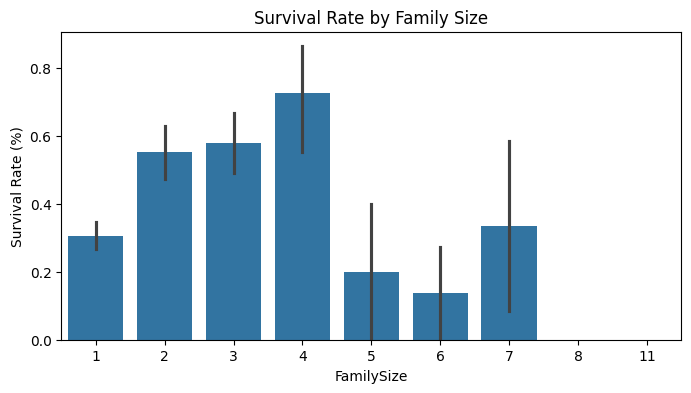

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate (%)')
plt.show()

In [26]:
df['Embarked'].value_counts(dropna=False)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\Daniel\AppData\Local\Temp\ipykernel_18120\2146065727.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [28]:
embark = df.groupby('Embarked')['Survived'].mean().mul(100).round(2)
print(embark)

#C = Cherbourg

#Q = Queenstown

#S = Southampton

Embarked
C    55.36
Q    38.96
S    33.90
Name: Survived, dtype: float64


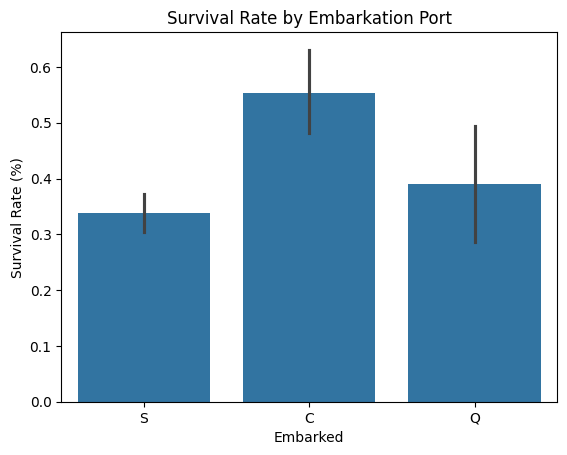

In [29]:


sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate (%)')
plt.show()

In [30]:
pd.crosstab(df['FamilySize'], df['Pclass'], values=df['Survived'], aggfunc='mean').round(2)


Pclass,1,2,3
FamilySize,,,
1,0.53,0.35,0.21
2,0.73,0.53,0.35
3,0.75,0.68,0.43
4,0.71,0.77,0.67
5,1.00,1.00,0.00
6,0.50,1.00,0.00
7,NaN,NaN,0.33
8,NaN,NaN,0.00
11,NaN,NaN,0.00


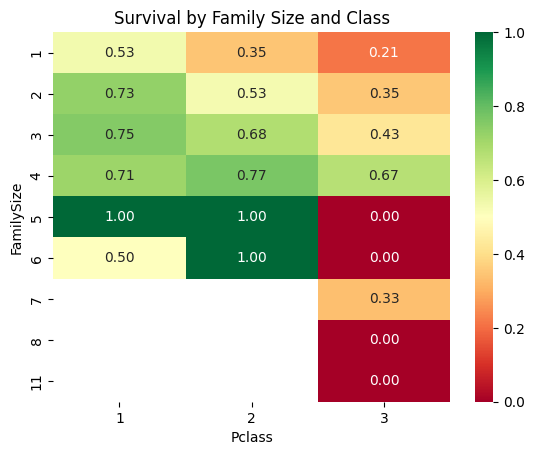

In [31]:
pivot = df.pivot_table(values='Survived', index='FamilySize', columns='Pclass', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('Survival by Family Size and Class')
plt.show()

In [23]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

PALETTE = ['#ff6b6b', '#ffd166', '#06d6a0', '#118ab2', '#9b5de5', '#f15bb5', '#00c2ff', '#ffa600']


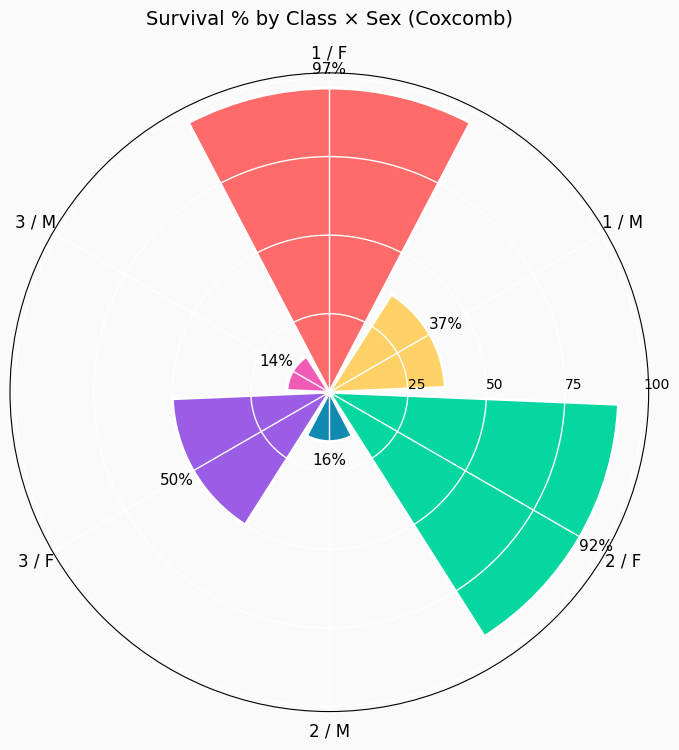

In [28]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

g = (df.groupby(['Pclass','Sex'])['Survived'].mean()
       .mul(100).round(1).reset_index())
order = [(1,'female'),(1,'male'),(2,'female'),(2,'male'),(3,'female'),(3,'male')]
g['key'] = list(zip(g['Pclass'], g['Sex']))
g = g.set_index('key').loc[order].reset_index()

labels = [f"{pc} / {sx[0].upper()}" for pc, sx in g['key']]
vals = g['Survived'].to_numpy()

fig, ax = plt.subplots(figsize=(7.6,7.6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi/2); ax.set_theta_direction(-1)
ax.set_facecolor('#fafafa'); fig.patch.set_facecolor('#fafafa')
ax.set_rmax(100); ax.set_rticks([25,50,75,100]); ax.set_rlabel_position(90)
ax.grid(color='white', lw=1)

N = len(vals); theta = np.linspace(0, 2*np.pi, N, endpoint=False)
width = 2*np.pi / N * 0.92
bars = ax.bar(theta, vals, width=width, bottom=0,
              color=[PALETTE[i%len(PALETTE)] for i in range(N)],
              edgecolor='white', linewidth=2)

ax.set_xticks(theta); ax.set_xticklabels(labels, fontsize=12)
for t, v in zip(theta, vals):
    ax.text(t, v + 6, f"{v:.0f}%", ha='center', va='center', fontsize=11)

ax.set_title("Survival % by Class × Sex (Coxcomb)", pad=14, fontsize=14)
plt.tight_layout(); plt.show()


<Axes: title={'center': 'Who Actually Survived (Count % by Sex)'}, ylabel='count'>

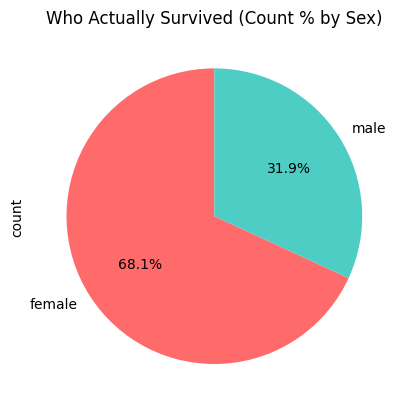

In [30]:
df_survivors = df[df['Survived']==1]
df_survivors['Sex'].value_counts().plot(
    kind='pie', autopct='%.1f%%', startangle=90, colors=['#ff6b6b','#4ecdc4'],
    title='Who Actually Survived (Count % by Sex)')


<Axes: title={'center': 'Survivors by Passenger Class'}, ylabel='count'>

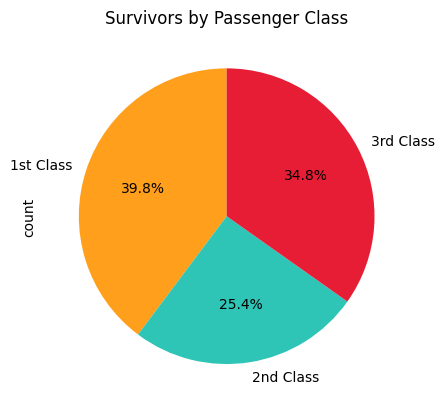

In [31]:
df[df['Survived']==1]['Pclass'].value_counts().sort_index().plot(
    kind='pie', autopct='%.1f%%', startangle=90,
    labels=['1st Class','2nd Class','3rd Class'],
    colors=['#ff9f1c','#2ec4b6','#e71d36'],
    title='Survivors by Passenger Class')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16244\2841144630.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df.groupby('AgeGroup')['Survived'].mean().mul(100).round(1)


<Axes: title={'center': 'Survival Rate by Age Group'}, ylabel='Survived'>

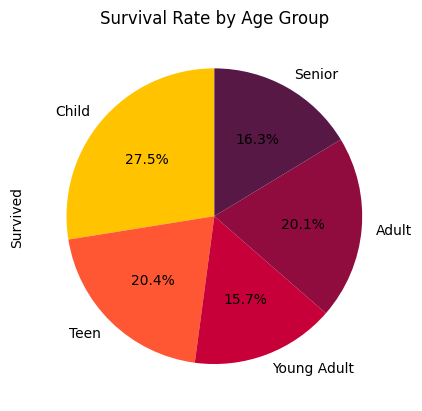

In [32]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['AgeGroup'] = pd.cut(df['Age'], [0,12,18,30,50,80],
                        labels=['Child','Teen','Young Adult','Adult','Senior'])

survival_rate = df.groupby('AgeGroup')['Survived'].mean().mul(100).round(1)

survival_rate.plot(
    kind='pie', autopct='%.1f%%', startangle=90,
    colors=['#ffc300','#ff5733','#c70039','#900c3f','#581845'],
    title='Survival Rate by Age Group')

<Axes: title={'center': 'Who Survived? (Women/Children vs Men)'}, ylabel='count'>

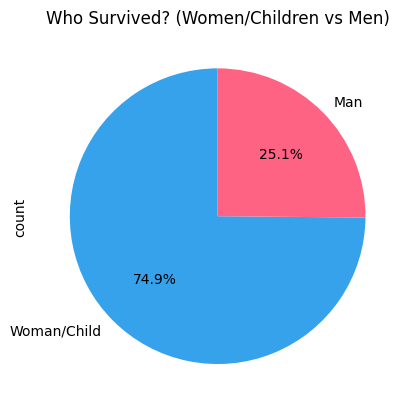

In [33]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Group'] = df.apply(
    lambda row: 'Woman/Child' if (row['Sex']=='female' or row['Age']<18) else 'Man',
    axis=1
)

survivor_counts = df[df['Survived']==1]['Group'].value_counts()

survivor_counts.plot(
    kind='pie', autopct='%.1f%%', startangle=90,
    colors=['#36a2eb','#ff6384'],
    title='Who Survived? (Women/Children vs Men)')

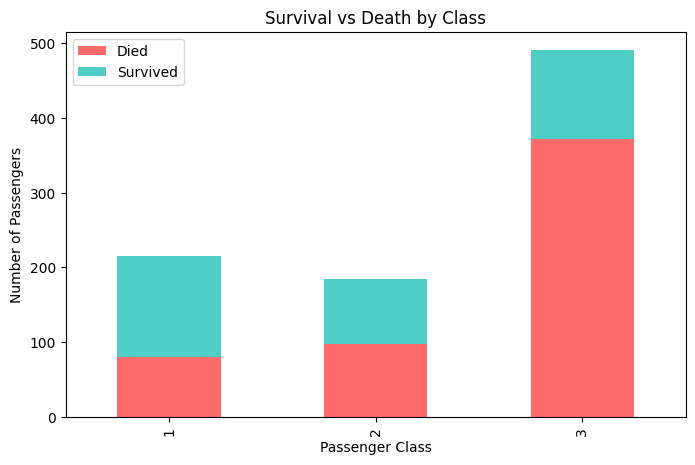

In [35]:
import pandas as pd

stack = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
stack

import matplotlib.pyplot as plt

stack.plot(kind='bar', stacked=True,
           color=['#ff6b6b', '#4ecdc4'], figsize=(8,5))

plt.title('Survival vs Death by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(['Died', 'Survived'])
plt.show()


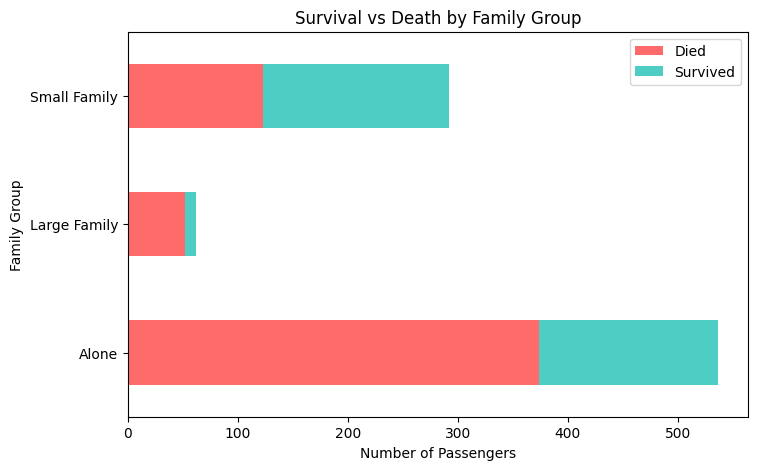

In [37]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

def family_category(size):
    if size == 1:
        return 'Alone'
    elif 2 <= size <= 4:
        return 'Small Family'
    else:
        return 'Large Family'

df['FamilyGroup'] = df['FamilySize'].apply(family_category)
df['FamilyGroup'].value_counts()

stack = df.groupby(['FamilyGroup', 'Survived']).size().unstack(fill_value=0)
stack

import matplotlib.pyplot as plt

stack.plot(kind='barh', stacked=True,
           color=['#ff6b6b', '#4ecdc4'], figsize=(8,5))

plt.title('Survival vs Death by Family Group')
plt.xlabel('Number of Passengers')
plt.ylabel('Family Group')
plt.legend(['Died', 'Survived'], loc='upper right')
plt.show()